In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
pi = math.pi
import copy

In [3]:
# Helper function definitions

def entropy(belief_grid):
    ent_H = 0
    for i in range(25):
        for j in range (25):
            p_ij = belief_grid[i][j]
            ent_H += -p_ij*np.log(p_ij)
    return ent_H

def update_model(array, measurement, loc):
    row = loc[0]
    col = loc[1]

    if (measurement == 0):
        for i in range(25):
            for j in range(25):
                if abs(col-i)==0 and abs(row-j)<=0:
                    array[i][j] = 1*10**-20
                elif abs(col-i)==3 and abs(row-j)<=3:
                    array[i][j] = 3./4.
                elif abs(col-i)==2 and abs(row-j)<=2:
                    array[i][j] = 2./3.
                elif abs(col-i)==1 and abs(row-j)<=1:
                    array[i][j] = 1./2. 
                else:
                    array[i][j] = 99./100.
    elif (measurement == 1):
        for i in range(25):
            for j in range(25):
                if abs(col-i)==0 and abs(row-j)<=0:
                    array[i][j] = 1
                elif abs(col-i)==3 and abs(row-j)<=3:
                    array[i][j] = 1./4.
                elif abs(col-i)==2 and abs(row-j)<=2:
                    array[i][j] = 1./3.
                elif abs(col-i)==1 and abs(row-j)<=1:
                    array[i][j] = 1./2. 
                else:
                    array[i][j] = 1./100.
    return array

def init_belief(array, loc):
    row = loc[0]
    col = loc[1]
    for i in range(25):
        for j in range(25):
            if abs(col-i)==0 and abs(row-j)<=0:
                array[i][j] = 1
            elif abs(col-i)==3 and abs(row-j)<=3:
                array[i][j] = 1./4.
            elif abs(col-i)==2 and abs(row-j)<=2:
                array[i][j] = 1./3.
            elif abs(col-i)==1 and abs(row-j)<=1:
                array[i][j] = 1./2. 
            else:
                array[i][j] = 1./100.
    return array

def genplot(data):
    cmap = colors.ListedColormap(['darkorchid', 'mediumpurple', 'cornflowerblue', 'lightskyblue', 'aquamarine', 'lightgreen', 'lightgrey'])
    bounds = [0, 0.2, 0.3, 0.4, 0.51, 0.7, 0.8, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    ax.set_xticks(np.arange(-0.5, 24.5, 1))
    ax.set_yticks(np.arange(-0.5, 24.5, 1))
    ax.imshow(data, cmap = cmap, norm = norm)
    plt.tick_params(bottom = False, top = False, left = False, right = False, labelbottom = False, labelleft = False)
    ax.grid()
    plt.xlim(-0.5, 24.5)
    plt.ylim(-0.5, 24.5)

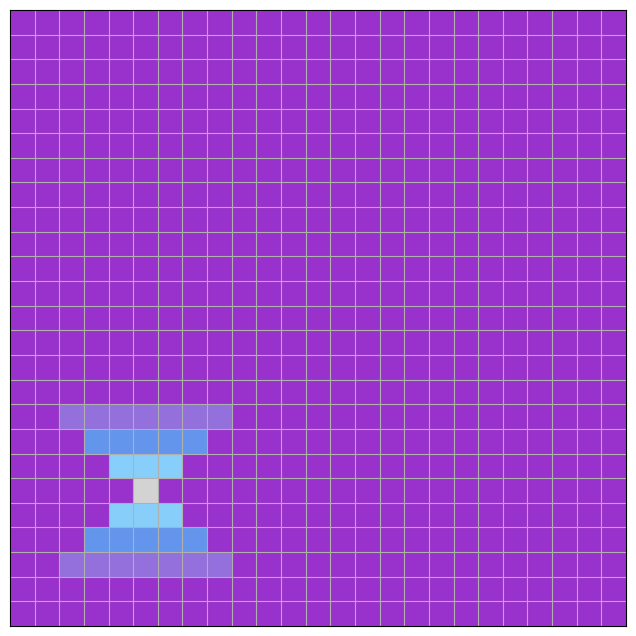

In [4]:
# initializations
D = np.array([5, 5]) # set to random later
A = np.array([15, 15]) # set to random later

prior = np.full([25, 25], 1/625)
belief = np.zeros([25,25])
belief = init_belief(belief, D)
H = entropy(belief)

genplot(belief)

In [5]:
# step 3 
def measurement(grid, loc):
    choices = np.array([1, 0])
    p = grid[loc[0]][loc[1]]
    probability = np.array([p, 1-p])
    prediction = np.random.choice(choices, p = probability)
    return prediction

# # initial measurement
# m = measurement(belief, A)
# mmodel = np.zeros([25,25])
# mmodel = update_model(mmodel, m, A)
# genplot(mmodel)

In [13]:
# step 4
def bayesian_update(prior, model):
    posterior = (prior@model)/np.sum(prior@model)
    return posterior

# # step 5
# updated_belief = bayesian_update(prior, mmodel)    
# newH = entropy(updated_belief)
        
    

In [1]:
def get_bayesian_update(loc, measurement, prior):
    row = loc[0]
    col = loc[1]
    array = np.zeros([25,25])

    if (measurement == 0):
        for i in range(25):
            for j in range(25):
                if abs(col-i)==0 and abs(row-j)<=0:
                    array[i][j] = 1*10**-20
                elif abs(col-i)==3 and abs(row-j)<=3:
                    array[i][j] = 3./4.
                elif abs(col-i)==2 and abs(row-j)<=2:
                    array[i][j] = 2./3.
                elif abs(col-i)==1 and abs(row-j)<=1:
                    array[i][j] = 1./2. 
                else:
                    array[i][j] = 99./100.
    elif (measurement == 1):
        for i in range(25):
            for j in range(25):
                if abs(col-i)==0 and abs(row-j)<=0:
                    array[i][j] = 1
                elif abs(col-i)==3 and abs(row-j)<=3:
                    array[i][j] = 1./4.
                elif abs(col-i)==2 and abs(row-j)<=2:
                    array[i][j] = 1./3.
                elif abs(col-i)==1 and abs(row-j)<=1:
                    array[i][j] = 1./2. 
                else:
                    array[i][j] = 1./100.

    posterior = (prior*array)/np.sum(prior*array)
    
    return posterior

In [7]:
# step 6
def action(prior, oldH, loc):
    # up
    print("current loc: ", loc)
    up = np.array([loc[0], loc[1]+1])
    E_up = -10000
    if (up[1] < 25):
        up0 = np.zeros([25,25])
        up0 = update_model(up0, 0, up)
        up0_post = bayesian_update(prior, up0)
        H_up0 = entropy(up0_post)

        up1 = np.zeros([25,25])
        up1 = update_model(up1, 1, up)
        up1_post = bayesian_update(prior, up1)
        H_up1 = entropy(up1_post)
        E_up = prior[loc[0]][loc[1]]*(oldH - H_up1) + (1-prior[loc[0]][loc[1]])*(oldH - H_up0)
    
    # down
    down = np.array([loc[0], loc[1]-1])
    E_down = -10000
    if (down[1] >= 0):
        down0 = np.zeros([25,25])
        down0 = update_model(down0, 0, down)
        down0_post = bayesian_update(prior, down0)
        H_down0 = entropy(down0_post)

        down1 = np.zeros([25,25])
        down1 = update_model(down1, 1, down)
        down1_post = bayesian_update(prior, down1)
        H_down1 = entropy(down1_post)
        E_down = prior[loc[0]][loc[1]]*(oldH - H_down1) + (1-prior[loc[0]][loc[1]])*(oldH - H_down0)
    
    # left
    left = np.array([loc[0]-1, loc[1]])
    E_left = -10000
    if (left[0] >= 0):
        left0 = np.zeros([25,25])
        left0 = update_model(left0, 0, left)
        left0_post = bayesian_update(prior, left0)
        H_left0 = entropy(left0_post)

        left1 = np.zeros([25,25])
        left1 = update_model(left1, 1, left)
        left1_post = bayesian_update(prior, left1)
        H_left1 = entropy(left1_post)
        E_left = prior[loc[0]][loc[1]]*(oldH - H_left1) + (1-prior[loc[0]][loc[1]])*(oldH - H_left0)

    # right
    right = np.array([loc[0]+1, loc[1]])
    E_right = -10000
    if (right[0] < 25):
        right0 = np.zeros([25,25])
        right0 = update_model(right0, 0, right)
        right0_post = bayesian_update(prior, right0)
        H_right0 = entropy(right0_post)

        right1 = np.zeros([25,25])
        right1 = update_model(right1, 1, right)
        right1_post = bayesian_update(prior, right1)
        H_right1 = entropy(right1_post)
        E_right = prior[loc[0]][loc[1]]*(oldH - H_right1) + (1-prior[loc[0]][loc[1]])*(oldH - H_right0)

    # stay
    stay0 = np.zeros([25,25])
    stay0 = update_model(stay0, 0, loc)
    stay0_post = bayesian_update(prior, stay0)
    H_stay0 = entropy(stay0_post)

    stay1 = np.zeros([25,25])
    stay1 = update_model(stay1, 1, loc)
    stay1_post = bayesian_update(prior, stay1)
    H_stay1 = entropy(stay1_post)
    E_stay = prior[loc[0]][loc[1]]*(oldH - H_stay1) + (1-prior[loc[0]][loc[1]])*(oldH - H_stay0)
    
    max_E = max(E_up, E_down, E_left, E_right, E_stay)
    E_array = np.array([E_up, E_down, E_left, E_right, E_stay])
    #print(E_array)

    if (max_E == E_up):
        new_loc = up
        print("up")
        return new_loc
    elif (max_E == E_down):
        new_loc = down
        print("down")
        return new_loc
    elif (max_E == E_left):
        new_loc = left
        print("left")
        return new_loc
    elif (max_E == E_right):
        new_loc = right
        print("right")
        return new_loc
    else:
        print("stay")
        return loc
    

In [ ]:
def get_action(robot_x,robot_y,posterior):
    post_entropy = calculate_entropy(posterior)
    print(post_entropy)

    entropy_reductions = np.zeros(5)

    # Choose Next Action
    # Up
    new_x = robot_x
    new_y = robot_y - 1

    if_one = replace_zeros(get_bayesian_update(new_x,new_y,1,posterior))
    if_zero = replace_zeros(get_bayesian_update(new_x,new_y,0,posterior))

    one_entropy = calculate_entropy(if_one)
    zero_entropy = calculate_entropy(if_zero)

    if(new_y > 0 and new_y < 25):
        entropy_reductions[0] = posterior[new_y][new_x]*(post_entropy - one_entropy) + (1 - posterior[new_y][new_x])*(post_entropy - zero_entropy)
    else:
        entropy_reductions[0] = -100000
        
    # Right
    new_x = robot_x + 1
    new_y = robot_y

    if_one = replace_zeros(get_bayesian_update(new_x,new_y,1,posterior))
    if_zero = replace_zeros(get_bayesian_update(new_x,new_y,0,posterior))

    one_entropy = calculate_entropy(if_one)
    zero_entropy = calculate_entropy(if_zero)

    if(new_x > 0 and new_x < 25):
        entropy_reductions[1] = posterior[new_y][new_x]*(post_entropy - one_entropy) + (1 - posterior[new_y][new_x])*(post_entropy - zero_entropy)
    else:
        entropy_reductions[1] = -100000
        
    # Down
    new_x = robot_x
    new_y = robot_y + 1

    if_one = replace_zeros(get_bayesian_update(new_x,new_y,1,posterior))
    if_zero = replace_zeros(get_bayesian_update(new_x,new_y,0,posterior))

    one_entropy = calculate_entropy(if_one)
    zero_entropy = calculate_entropy(if_zero)

    if(new_y > 0 and new_y < 25):
        entropy_reductions[2] = posterior[new_y][new_x]*(post_entropy - one_entropy) + (1 - posterior[new_y][new_x])*(post_entropy - zero_entropy)
    else:
        entropy_reductions[2] = -100000

    # Left
    new_x = robot_x - 1
    new_y = robot_y

    if_one = replace_zeros(get_bayesian_update(new_x,new_y,1,posterior))
    if_zero = replace_zeros(get_bayesian_update(new_x,new_y,0,posterior))

    one_entropy = calculate_entropy(if_one)
    zero_entropy = calculate_entropy(if_zero)

    if(new_x > 0 and new_x < 25):
        entropy_reductions[3] = posterior[new_y][new_x]*(post_entropy - one_entropy) + (1 - posterior[new_y][new_x])*(post_entropy - zero_entropy)
    else:
        entropy_reductions[3] = -100000
        
    # Stay
    new_x = robot_x
    new_y = robot_y

    if_one = replace_zeros(get_bayesian_update(new_x,new_y,1,posterior))
    if_zero = replace_zeros(get_bayesian_update(new_x,new_y,0,posterior))

    one_entropy = calculate_entropy(if_one)
    zero_entropy = calculate_entropy(if_zero)

    entropy_reductions[4] = posterior[new_y][new_x]*(post_entropy - one_entropy) + (1 - posterior[new_y][new_x])*(post_entropy - zero_entropy)

    action = np.argmax(entropy_reductions)
    
    return action

In [8]:
#action(updated_belief, newH, A)

In [ ]:
# initializations
D = np.array([5, 5]) # set to random later
A = np.array([15, 15]) # set to random later
loc_list = list()
loc_list.append(A)

threshold = 0.01

prior = np.full([25, 25], 1/625)
belief = np.zeros([25,25])
belief = init_belief(belief, D)
H = entropy(belief)

m = measurement(belief, A)
mmodel = np.zeros([25,25])
mmodel = update_model(mmodel, m, A)

belief = bayesian_update(prior, mmodel)    
H = entropy(belief)
newloc = action(belief, H, A)
loc_list.append(newloc)
print(newloc)

while (H > threshold):
    m = measurement(belief, newloc)
    print("measurement: ", newloc)
    mmodel = update_model(mmodel, m, newloc)
    print("mmodel: ", newloc)
    belief = bayesian_update(belief, mmodel)
    H = entropy(belief)
    print(H)
    newloc = action(belief, H, newloc)
    print("action: ", newloc)
    loc_list.append(newloc)
    

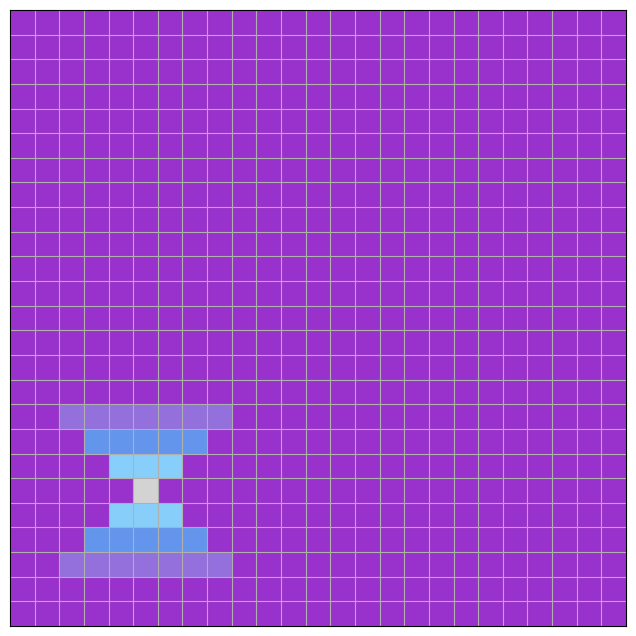

In [10]:
# initializations
D = np.array([5, 5]) # set to random later
A = np.array([15, 15]) # set to random later
loc_list = list()
loc_list.append(A)

threshold = 0.01

prior = np.full([25, 25], 1/625)
belief = np.zeros([25,25])
belief = init_belief(belief, D)
genplot(belief)

[[0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00162263 0.00157939 0.00151387 0.00144768 0.00151387 0.00157939
  0.00162263 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472]
 [0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00162263 0.00157939 0.00151387 0.00144768 0.00151387 0.00157939
  0.00162263 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472]
 [0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00162263 0.00157939 0.00151387 0.00144768 0.00151387 0.00157939
  0.00162263 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472]
 [0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00165472 0.00165472 0.00165472 0.00165472 0.00165472 0.00165472
  0.00

/var/folders/qk/0974z_p55lv5x2q9dj40s8240000gn/T/ipykernel_3431/2913518512.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,8))


6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc:  [12 20]
up
[12 21]
6.43672536004053
current loc:  [12 21]
down
[12 20]
6.43672536004053
current loc: 

KeyboardInterrupt: 

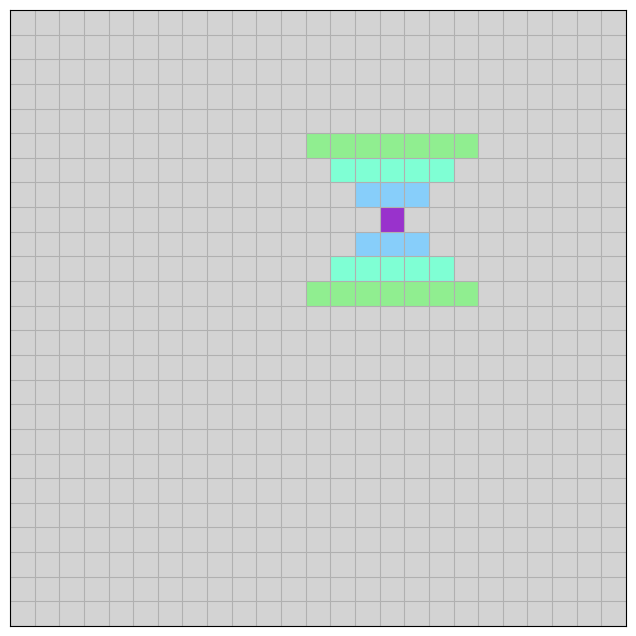

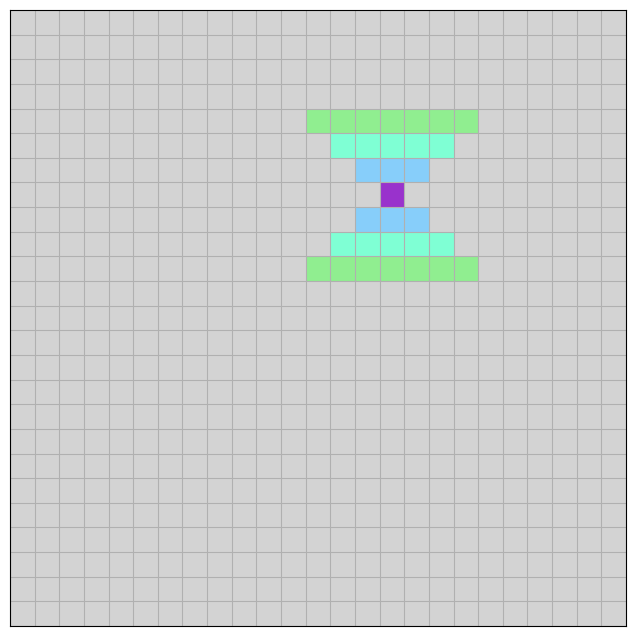

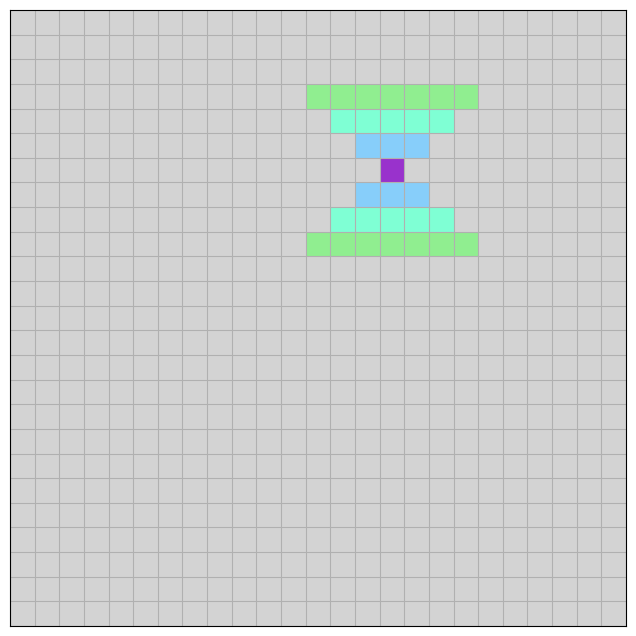

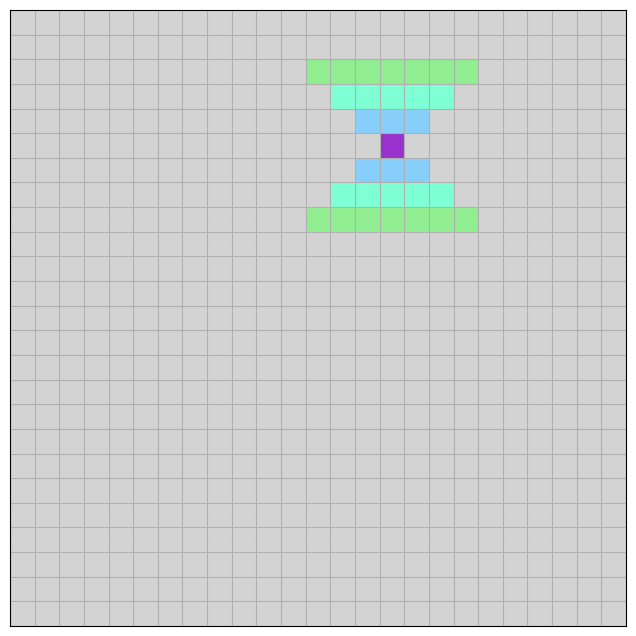

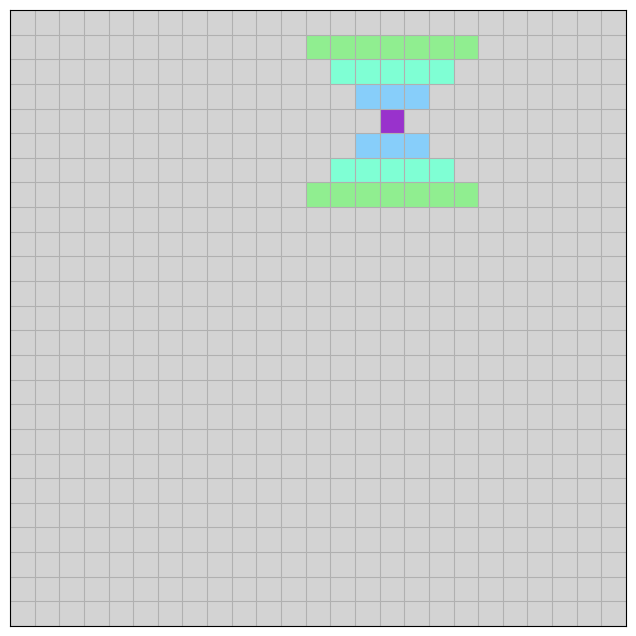

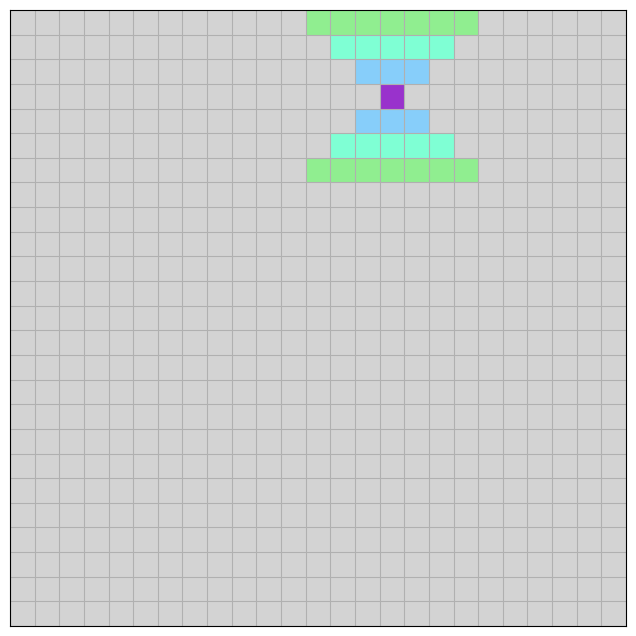

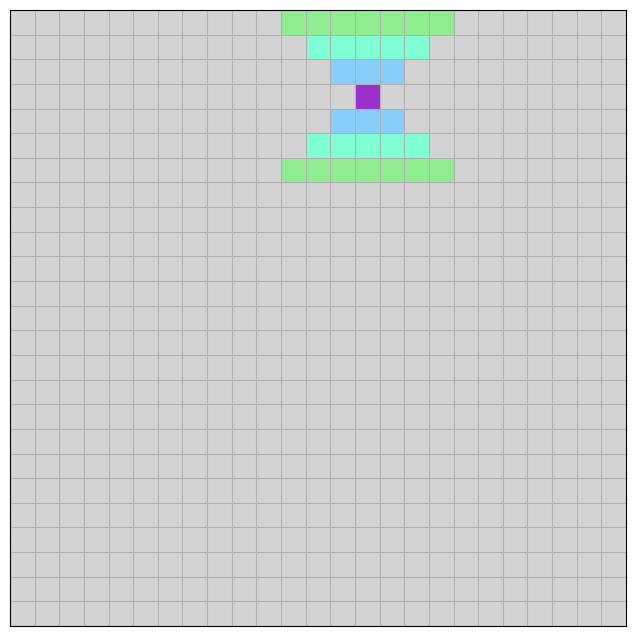

In [16]:
m = measurement(belief, A)

mmodel = update_model(prior, m, A)
posterior = bayesian_update(prior, mmodel)
print(posterior)
post_entropy = entropy(posterior)
print(post_entropy)
newloc = A
while(post_entropy > threshold):
    newloc = action(posterior, post_entropy, newloc)
    print(newloc)
    loc_list.append(newloc)
    prior = copy.deepcopy(posterior)
    m = measurement(belief, newloc)
    mmodel = update_model(prior, m, newloc)
    posterior = bayesian_update(prior, mmodel)
    post_entropy = entropy(posterior)
    print(post_entropy)